In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uncertainty_toolbox as uct
import scienceplots

plt.style.use(['science', 'notebook'])

%matplotlib inline

In [3]:
test_df = pd.read_csv("experiments/VDss_Liu2022/IVIT/JMQR/fold0/test_predictions.csv", index_col=0).sort_values("Y_TRUE")

In [4]:
test_df.head()

,Y_TRUE,Y_PRED_MEAN,Y_PRED_Q5,Y_PRED_Q10,Y_PRED_Q15,Y_PRED_Q20,Y_PRED_Q25,Y_PRED_Q30,Y_PRED_Q35,Y_PRED_Q40,...,Y_PRED_Q50,Y_PRED_Q55,Y_PRED_Q59,Y_PRED_Q65,Y_PRED_Q70,Y_PRED_Q75,Y_PRED_Q80,Y_PRED_Q85,Y_PRED_Q90,Y_PRED_Q95
O=C1NC(c2ccccc2)(c2ccccc2)C(=O)N1COP(=O)(O)O,-1.221849,-0.906396,-1.361915,-1.269229,-1.201846,-1.150964,-1.115564,-1.086157,-1.051408,-1.013117,...,-0.974586,-0.935730,-0.907090,-0.863167,-0.835755,-0.768638,-0.708299,-0.628452,-0.520387,-0.269727
CON=C(C(=O)NC1C(=O)N2C(C(=O)O)=C(CSc3nc(=O)c(=O)[nH]n3C)CSC12)c1csc(N)n1,-1.070581,-0.933040,-1.323105,-1.240245,-1.177847,-1.125924,-1.100181,-1.074578,-1.050446,-1.011549,...,-0.983528,-0.953483,-0.939714,-0.902994,-0.878285,-0.829512,-0.777828,-0.714876,-0.620405,-0.391274
C[C@@](O)(/C=C/[C@H]1CC=CC(=O)O1)[C@@H](C[C@@H](O)/C=C\C=C/C=C/CO)OP(=O)(O)O,-1.065502,-0.956991,-1.564834,-1.440671,-1.359614,-1.304730,-1.251954,-1.221045,-1.171483,-1.119285,...,-1.054726,-1.011655,-0.948994,-0.877393,-0.851824,-0.743061,-0.660912,-0.556020,-0.396075,-0.089885
C[C@@H](C(=O)O)c1cccc(Oc2ccccc2)c1,-1.000000,-0.924127,-1.347021,-1.251966,-1.195655,-1.147381,-1.119454,-1.092262,-1.057881,-1.024344,...,-0.978798,-0.948015,-0.924426,-0.876725,-0.857884,-0.789191,-0.735857,-0.657572,-0.554971,-0.310600
CN(C)C(=O)CCSC(SCCC(=O)O)c1cccc(/C=C/c2ccc3ccc(Cl)cc3n2)c1,-0.958607,-0.959234,-1.425660,-1.325356,-1.260485,-1.215418,-1.177230,-1.149229,-1.112827,-1.076428,...,-1.020031,-0.987888,-0.955669,-0.894854,-0.880169,-0.798257,-0.741865,-0.656971,-0.536160,-0.272959


In [6]:
y_intervals = test_df.loc[:, ["Y_PRED_Q5", "Y_PRED_Q95"]]
y_residuals = (test_df["Y_PRED_MEAN"] - test_df["Y_TRUE"]).abs()

In [7]:
np.quantile(y_residuals, 0.9)

0.6572005254233757

In [20]:
y_lower = y_intervals.iloc[:, 0]
y_upper = y_intervals.iloc[:, -1]
error_low = y_lower - valid_df["Y_TRUE"]
error_high = valid_df["Y_TRUE"] - y_upper
error = np.maximum(error_high, error_low)

In [23]:
np.quantile(error, 0.9)

0.1045347137689005

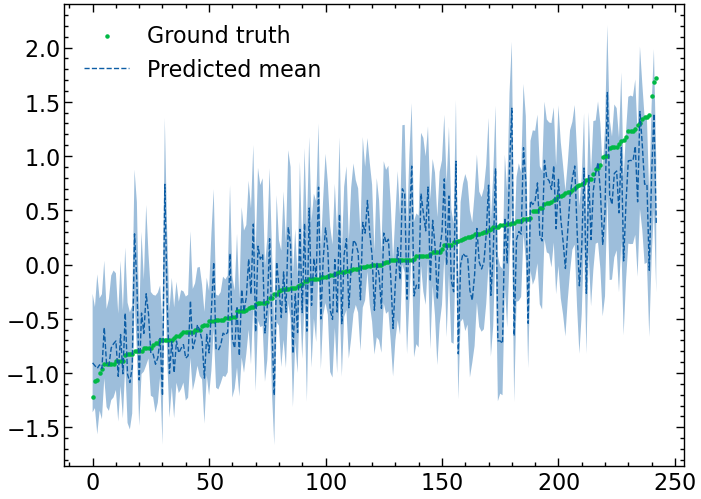

In [8]:
x = np.arange(len(test_df["Y_TRUE"]))
plt.fill_between(x, test_df["Y_PRED_Q5"], test_df["Y_PRED_Q95"], interpolate=True, alpha=0.4)
plt.scatter(x, test_df["Y_TRUE"], s=5, label="Ground truth")
plt.plot(x, test_df["Y_PRED_MEAN"], linestyle='dashed', linewidth=1, label="Predicted mean")
plt.legend()

In [9]:
df = test_df.copy()

((df["Y_TRUE"] < df["Y_PRED_Q95"]) & (df["Y_TRUE"] > df["Y_PRED_Q5"])).sum() / len(df["Y_TRUE"])

0.897119341563786

In [10]:
(df["Y_PRED_Q95"] - df["Y_PRED_Q5"]).mean()

1.2237803573796224

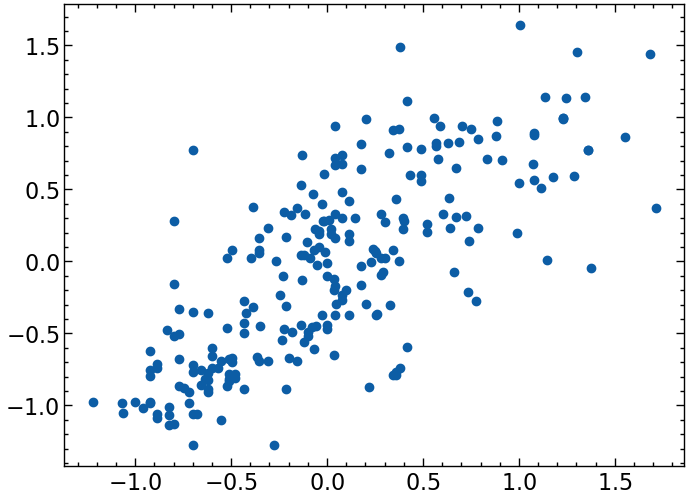

In [11]:
plt.scatter(df["Y_TRUE"].values, df["Y_PRED_Q50"].values)

In [12]:
uct.get_all_accuracy_metrics(df["Y_PRED_Q50"].values, df["Y_TRUE"].values)

 (1/n) Calculating accuracy metrics


{'mae': 0.35754250808604343,
 'rmse': 0.45531461404874013,
 'mdae': 0.2897657814148846,
 'marpd': 98.99418234849821,
 'r2': 0.4569391311445038,
 'corr': 0.751075913442818}

In [1]:
import uncertainty_toolbox as uct

# Load an example dataset of 100 predictions, uncertainties, and observations
predictions, predictions_std, y, x = uct.data.synthetic_sine_heteroscedastic(100)

# Compute all uncertainty metrics
metrics = uct.metrics.get_all_metrics(predictions, predictions_std, y)

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:00<00:00, 11.96it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:00<00:00, 12.06it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.313
  RMSE          0.443
  MDAE          0.193
  MARPD         61.875
  R2            0.697
  Correlation   0.836
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.036
  Mean-absolute Calibration Error       0.028
  Miscalibration Area                   0.029
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.151
     Group Size: 0.56 -- Calibration Error: 0.058
     Group Size: 1.00 -- Calibration Error: 0.028
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.189
     Group Size: 0.56 -- Calibration Error: 0.071
     Group Size: 1.00 -- Calibration Error: 0.036
===============

In [8]:
met = uct.metrics.get_all_adversarial_group_calibration(predictions, predictions_std, y, num_bins=5)

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:00<00:00, 12.36it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:00<00:00, 12.18it/s]


In [9]:
met

{'ma_adv_group_cal': {'group_sizes': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
  'adv_group_cali_mean': array([0.25      , 0.12090909, 0.07818182, 0.05969697, 0.04863636,
         0.04107143, 0.03253731, 0.03153846, 0.02561798, 0.016     ]),
  'adv_group_cali_stderr': array([0.05270463, 0.02573082, 0.02469279, 0.00869509, 0.00527046,
         0.00757614, 0.00470932, 0.00419588, 0.00399188, 0.        ])},
 'rms_adv_group_cal': {'group_sizes': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
  'adv_group_cali_mean': array([0.34609565, 0.15648518, 0.11594915, 0.08963448, 0.07186822,
         0.05250494, 0.05096644, 0.04407671, 0.03555029, 0.02529822]),
  'adv_group_cali_stderr': array([0.07614171, 0.03611009, 0.01461196, 0.01483177, 0.01174808,
         0.00691022, 0.00839121, 0.0038288 , 0.00363624, 0.    

In [11]:
import pandas as pd

In [13]:
pd.json_normalize(met)

TypeError: explode() missing 1 required positional argument: 'column'